<a href="https://www.kaggle.com/code/vtrackstar/historic-fantasy-football-teams?scriptVersionId=195215337" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Ask
* Determine best NFL fantasy football team based on default Yahoo full PPR settings and the data available:
    * Passing Yards: 0.04 points per yard (1 point for every 25 yards)
    * Passing Completions: 1 point per reception
    * Passing Touchdowns: 6 points
    * Interceptions Thrown: -1 point
    * Rushing Yards: 0.1 points per yard (1 point for every 10 yards)
    * Rushing Touchdowns: 6 points
    * Fumbles Lost: -2 points

## Prepare and Process

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
team_stats = pd.read_csv('/kaggle/input/nfl-team-stats-data-analytics-project/cleaned_team_stats_03_23_nfldata.csv')
team_stats.head()
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfl-team-stats-data-analytics-project/cleaned_team_stats_03_23_nfldata.csv
/kaggle/input/nfl-team-stats-data-analytics-project/__results__.html
/kaggle/input/nfl-team-stats-data-analytics-project/__notebook__.ipynb
/kaggle/input/nfl-team-stats-data-analytics-project/__output__.json
/kaggle/input/nfl-team-stats-data-analytics-project/custom.css
/kaggle/input/nfl-team-stats-data-analytics-project/__results___files/__results___7_4.png
/kaggle/input/nfl-team-stats-data-analytics-project/__results___files/__results___8_3.png
/kaggle/input/nfl-team-stats-data-analytics-project/__results___files/__results___14_0.png
/kaggle/input/nfl-team-stats-data-analytics-project/__results___files/__results___7_1.png
/kaggle/input/nfl-team-stats-data-analytics-project/__results___files/__results___7_8.png
/kaggle/input/nfl-team-stats-data-analytics-project/__results___files/__results___12_3.png
/kaggle/input/nfl-team-stats-data-analytics-project/__results___files/__results___7_2.png
/kaggle/

,year,team,wins,losses,win_loss_perc,points,points_opp,points_diff,mov,g,...,rush_yds_per_att,rush_fd,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot,ties,division
0,2003,New England Patriots,14,2,0.875,348,238,110,6.9,16,...,3.4,91,111,998,26,27.9,11.3,-136.51,0.0,AFC East
1,2003,Miami Dolphins,10,6,0.625,311,261,50,3.1,16,...,3.7,99,103,913,22,28.1,17.2,-177.92,0.0,AFC East
2,2003,Buffalo Bills,6,10,0.375,243,279,-36,-2.3,16,...,3.9,96,106,891,22,21.9,17.6,-230.07,0.0,AFC East
3,2003,New York Jets,6,10,0.375,283,299,-16,-1.0,16,...,4.0,78,69,550,15,32.4,11.8,-107.89,0.0,AFC East
4,2003,Baltimore Ravens,10,6,0.625,391,281,110,6.9,16,...,4.8,115,126,970,23,31.8,16.6,-220.50,0.0,AFC North


In [2]:
print(team_stats.columns)

Index(['year', 'team', 'wins', 'losses', 'win_loss_perc', 'points',
       'points_opp', 'points_diff', 'mov', 'g', 'total_yards', 'plays_offense',
       'yds_per_play_offense', 'turnovers', 'fumbles_lost', 'first_down',
       'pass_cmp', 'pass_att', 'pass_yds', 'pass_td', 'pass_int',
       'pass_net_yds_per_att', 'pass_fd', 'rush_att', 'rush_yds', 'rush_td',
       'rush_yds_per_att', 'rush_fd', 'penalties', 'penalties_yds', 'pen_fd',
       'score_pct', 'turnover_pct', 'exp_pts_tot', 'ties', 'division'],
      dtype='object')


In [3]:
# Determine Fantasy Football Scoring based on Yahoo default

def calculate_fantasy_points(df):
    # Yahoo default half PPR scoring rules
    team_stats['fantasy_points'] = (
        (team_stats['pass_yds'] * 0.04) +            # Passing Yards (0.04 points per yard)
        (team_stats['pass_td'] * 6) +                # Passing Touchdowns (6 points each)
        (team_stats['pass_int'] * -1) +              # Interceptions Thrown (-1 point each)
        (team_stats['rush_yds'] * 0.1) +             # Rushing Yards (0.1 points per yard)
        (team_stats['rush_td'] * 6) +                # Rushing Touchdowns (6 points each)
        (team_stats['pass_cmp'] * 1) -                   # Passing Completions (1 points each)
        (team_stats['fumbles_lost'] * -2)            # Fumbles lost (-2 points each)
    )
    
    return team_stats

team_stats = calculate_fantasy_points(team_stats)

team_stats['avg_fan_points'] = team_stats['fantasy_points'] / team_stats['g']

# Now you can inspect the fantasy points calculated
print(team_stats[['team', 'year', 'division', 'fantasy_points', 'avg_fan_points']])

                     team  year   division  fantasy_points  avg_fan_points
0    New England Patriots  2003   AFC East          818.98       51.186250
1          Miami Dolphins  2003   AFC East          747.38       46.711250
2           Buffalo Bills  2003   AFC East          727.76       45.485000
3           New York Jets  2003   AFC East          774.14       48.383750
4        Baltimore Ravens  2003  AFC North          797.60       49.850000
..                    ...   ...        ...             ...             ...
667     Carolina Panthers  2023  NFC South          766.54       45.090588
668   San Francisco 49ers  2023   NFC West         1110.26       65.309412
669      Los Angeles Rams  2023   NFC West          989.02       58.177647
670      Seattle Seahawks  2023   NFC West          887.40       52.200000
671     Arizona Cardinals  2023   NFC West          927.26       54.544706

[672 rows x 5 columns]


## Analyze

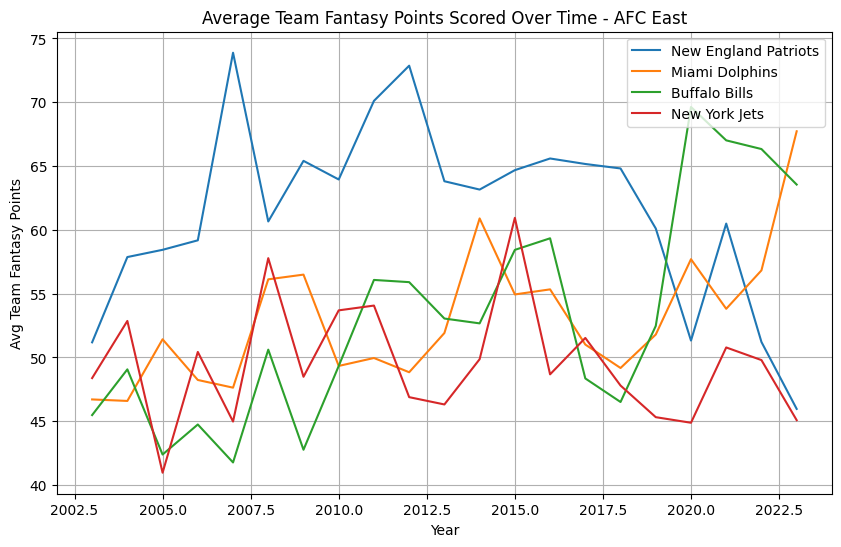

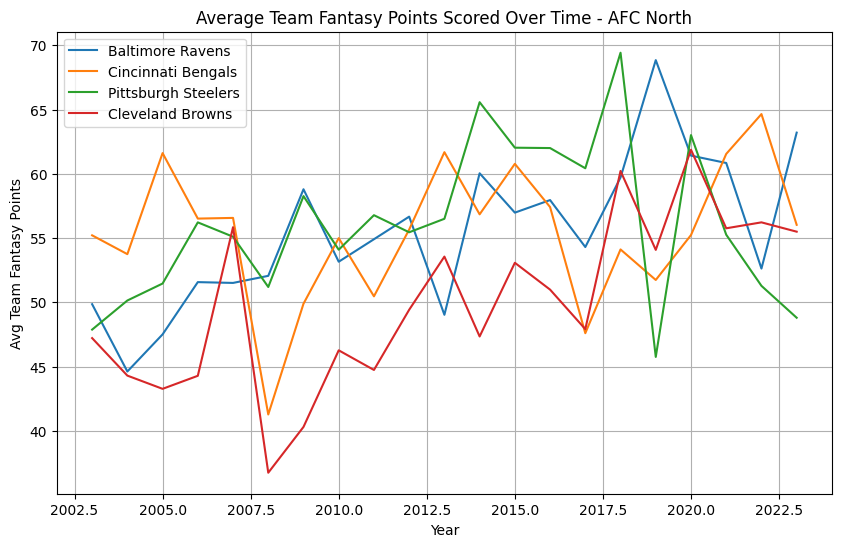

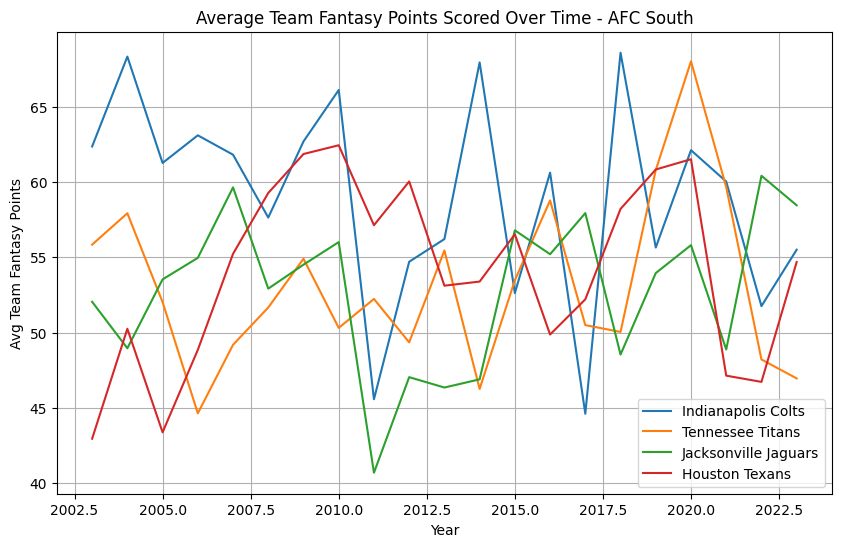

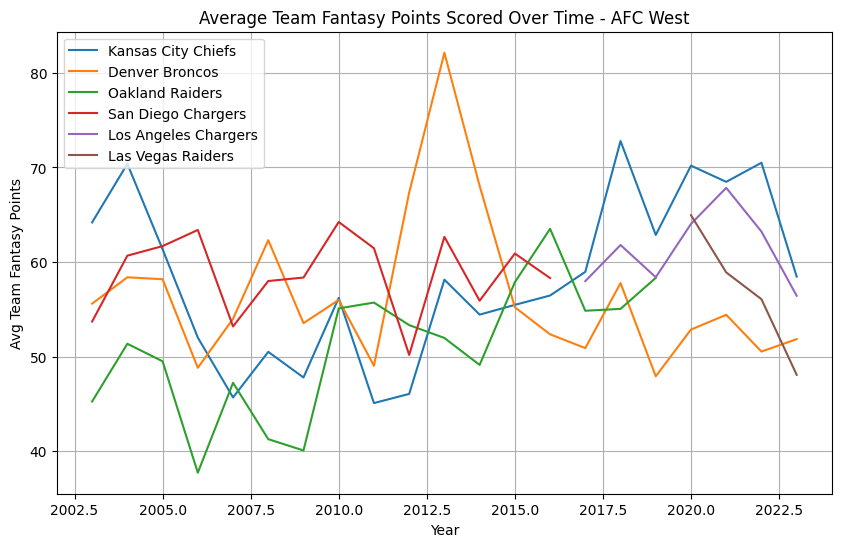

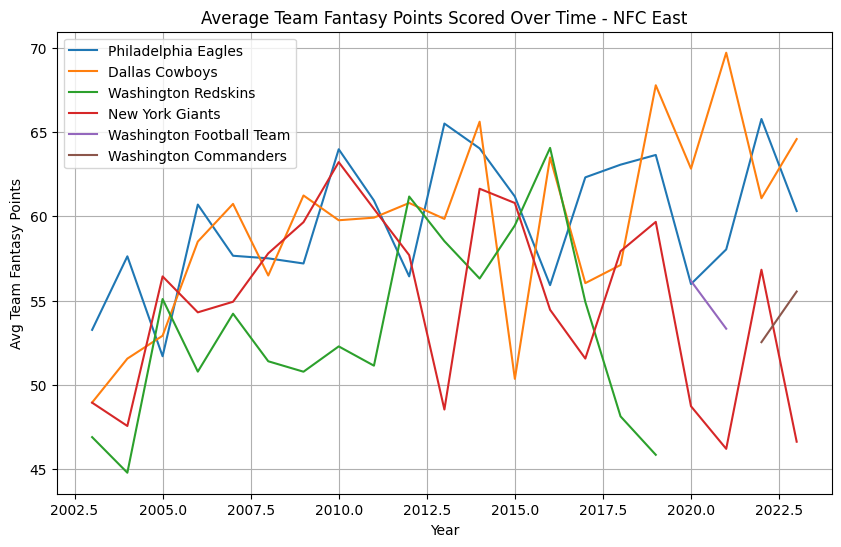

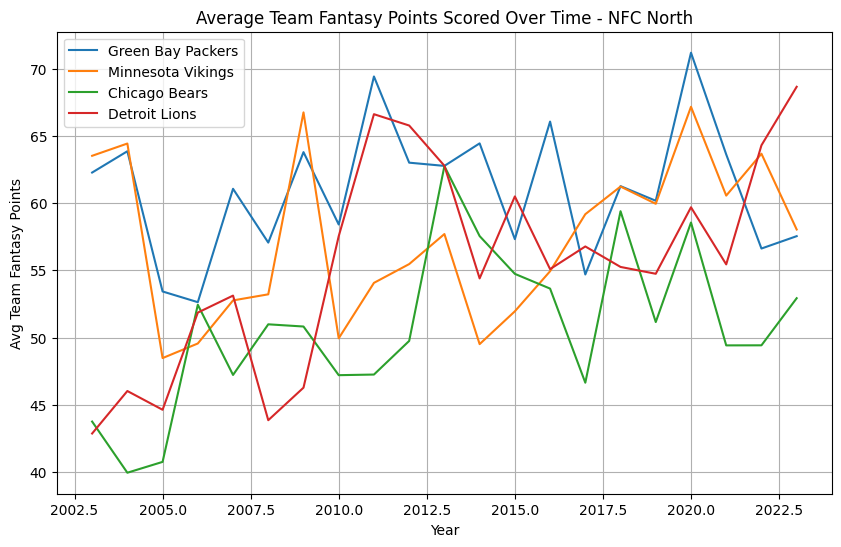

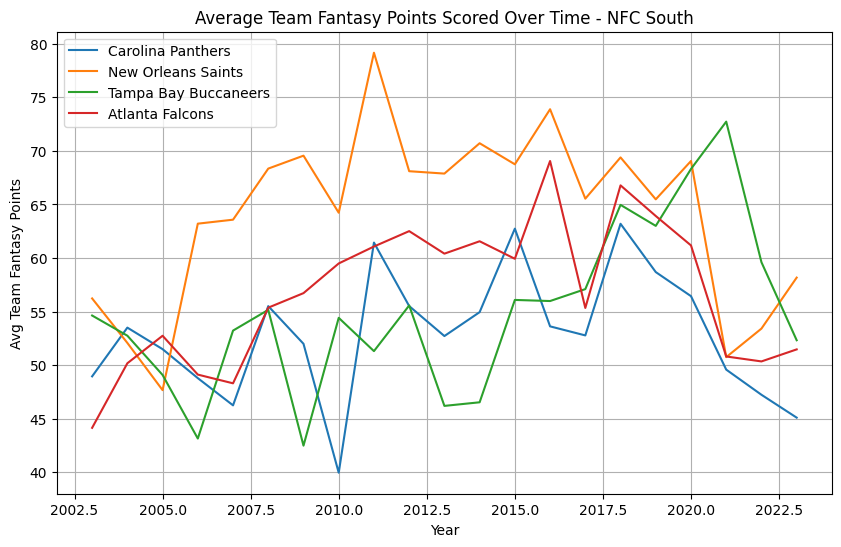

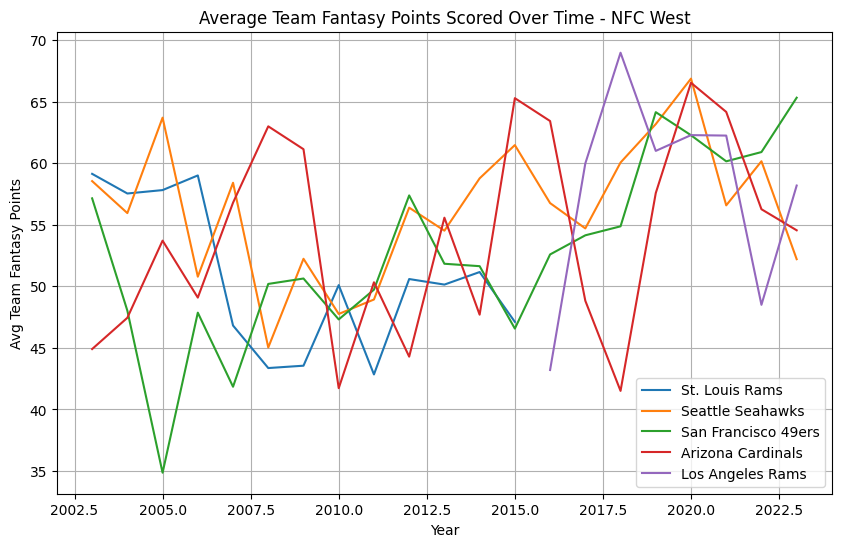

In [4]:
# Plot to see trends

# Get unique divisions
divisions = team_stats['division'].unique()

# Plotting for each division
for division in divisions:
    # Filter data for the current division
    division_data = team_stats[team_stats['division'] == division]
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    for team in division_data['team'].unique():
        team_data = division_data[division_data['team'] == team]
        plt.plot(team_data['year'], team_data['avg_fan_points'], label=team)    
    plt.title(f"Average Team Fantasy Points Scored Over Time - {division}")
    plt.xlabel("Year")
    plt.ylabel("Avg Team Fantasy Points")
    plt.grid(True)
    plt.legend()
    plt.show() 

In [5]:
# Create an empty list to store the results
results = []

# Group by 'year' and 'division'
grouped = team_stats.groupby(['year', 'division'])

# Iterate over each group
for (year, division), group_data in grouped:
    # Find the team with the maximum fantasy points
    max_row = group_data.loc[group_data['avg_fan_points'].idxmax()]
    max_team = max_row['team']
    max_points = max_row['avg_fan_points']
    
    # Find the team with the minimum fantasy points
    min_row = group_data.loc[group_data['avg_fan_points'].idxmin()]
    min_team = min_row['team']
    min_points = min_row['avg_fan_points']
    
    # Append the results to the list
    results.append({
        'year': year,
        'division': division,
        'highest scoring team (average FP)': max_team,
        'highest team FP per game': max_points,
        'lowest scoring team (average FP)': min_team,
        'lowest team FP per game': min_points
    })

# Convert the list of results to a DataFrame
result_df = pd.DataFrame(results)

# Display the result DataFrame
print(result_df)

     year   division highest scoring team (average FP)  \
0    2003   AFC East              New England Patriots   
1    2003  AFC North                Cincinnati Bengals   
2    2003  AFC South                Indianapolis Colts   
3    2003   AFC West                Kansas City Chiefs   
4    2003   NFC East               Philadelphia Eagles   
..    ...        ...                               ...   
163  2023   AFC West                Kansas City Chiefs   
164  2023   NFC East                    Dallas Cowboys   
165  2023  NFC North                     Detroit Lions   
166  2023  NFC South                New Orleans Saints   
167  2023   NFC West               San Francisco 49ers   

     highest team FP per game lowest scoring team (average FP)  \
0                   51.186250                    Buffalo Bills   
1                   55.211250                 Cleveland Browns   
2                   62.353750                   Houston Texans   
3                   64.196250          

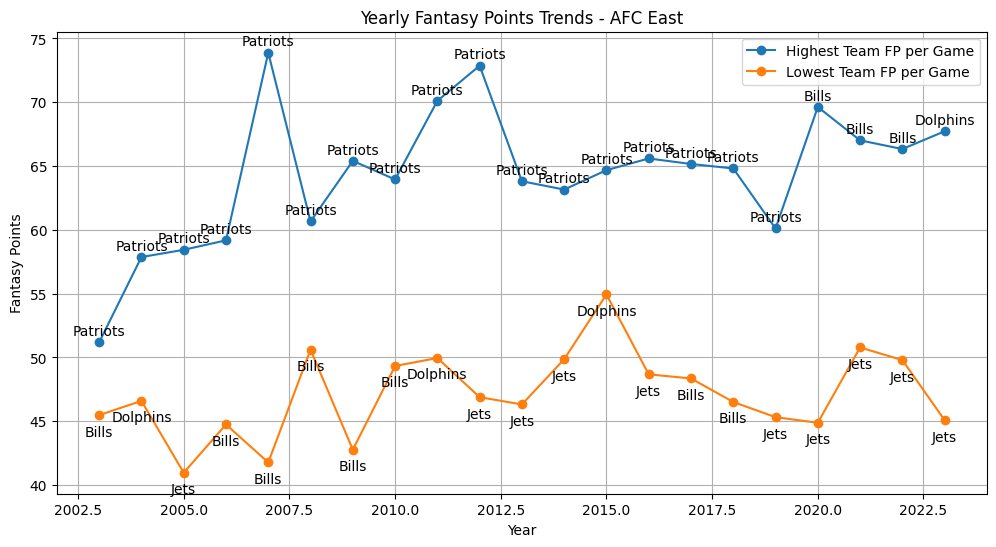

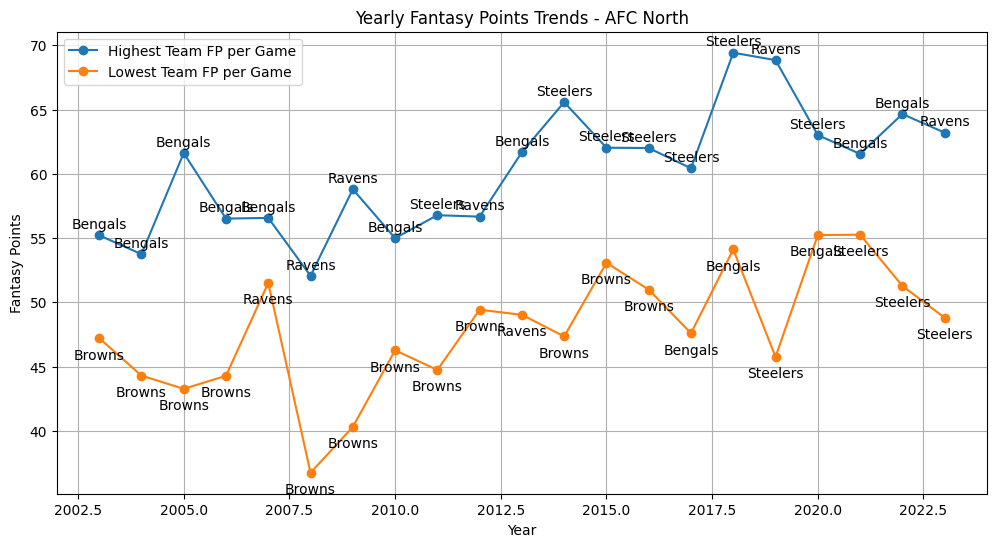

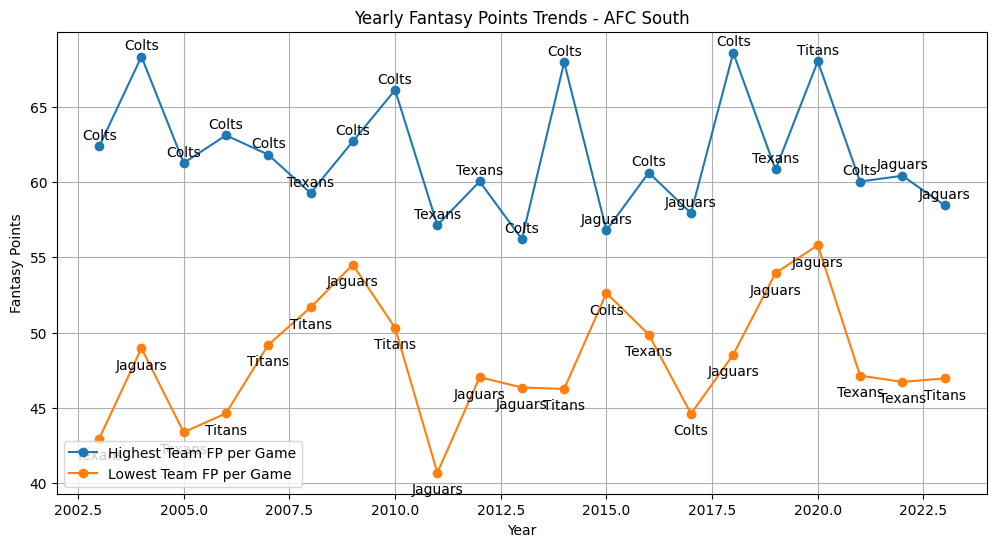

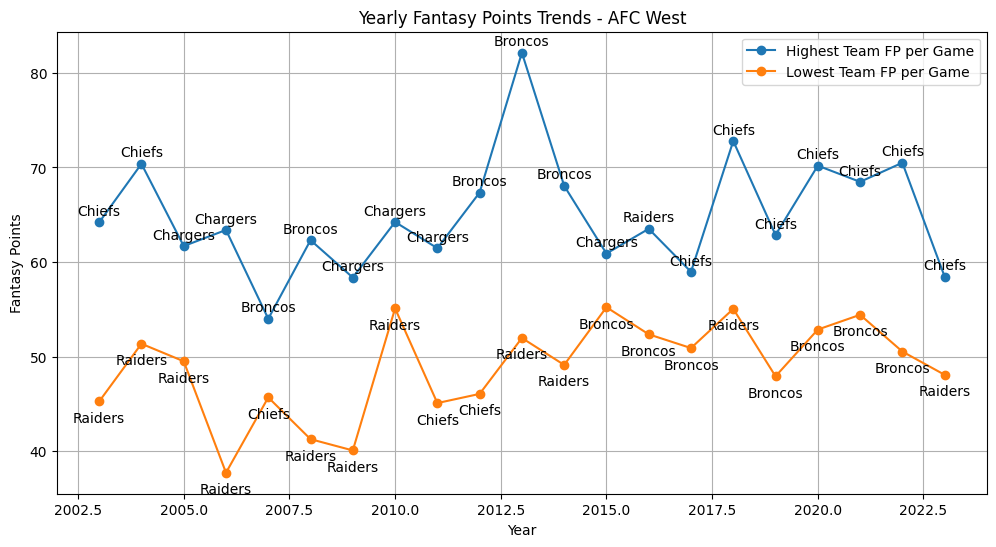

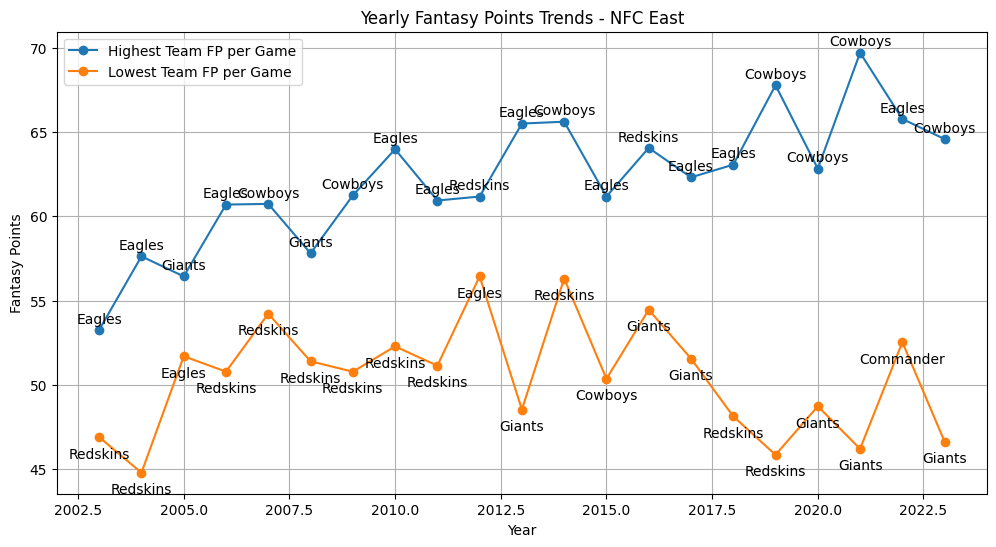

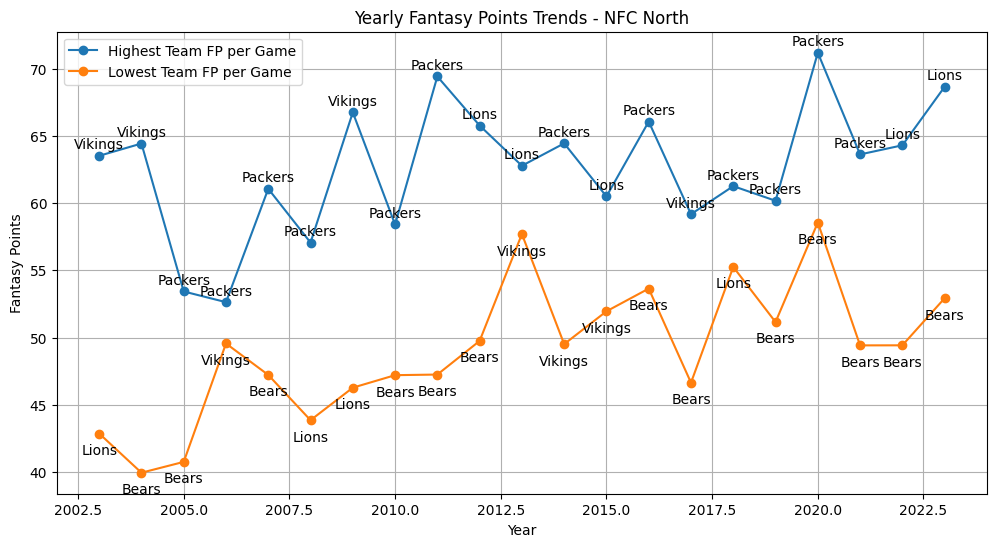

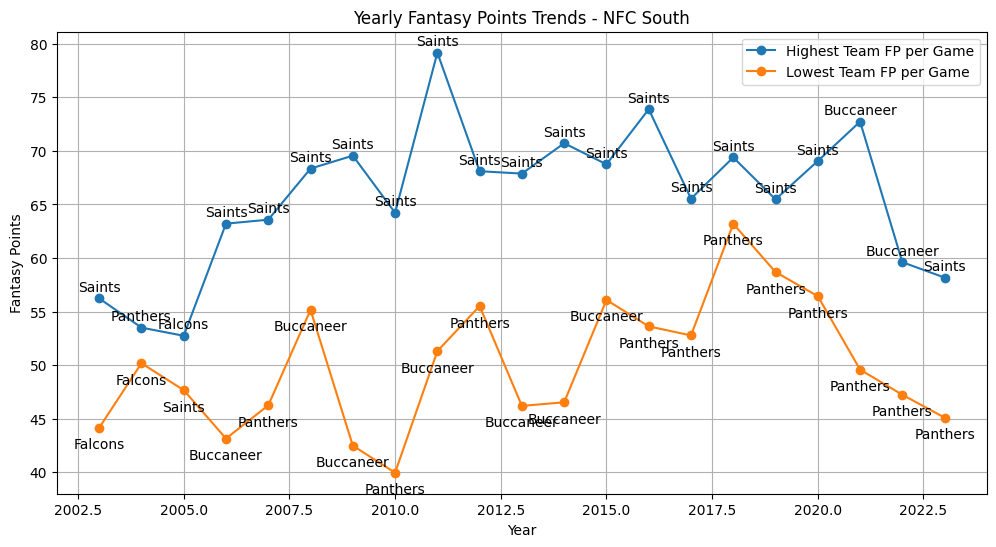

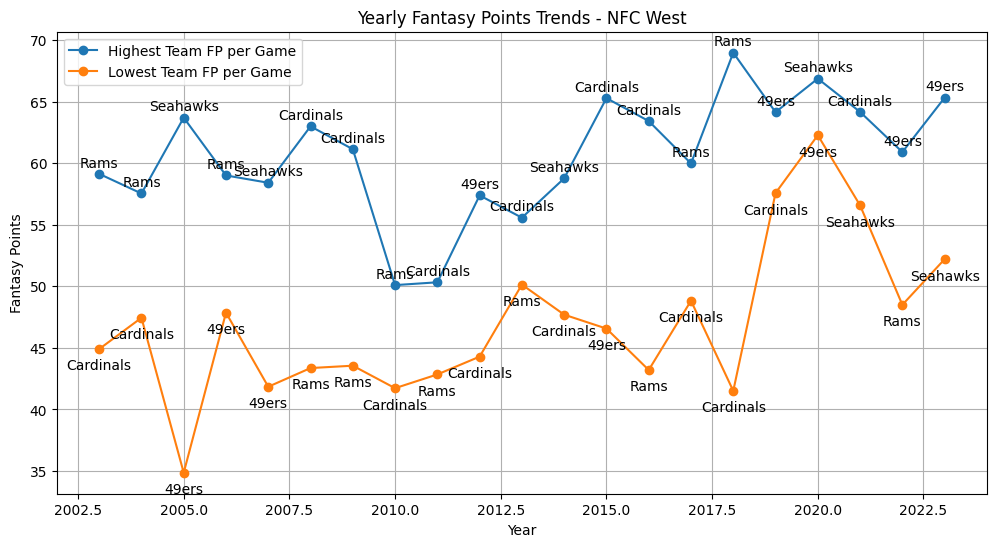

In [6]:
def extract_last_part(name, num_chars=9):
    # Extract the last part of the string up to the first space from the right
    parts = name.rsplit(' ', 1)
    if len(parts) > 1:
        return parts[-1][:num_chars]
    return name[:num_chars]

# Get unique divisions
divisions = result_df['division'].unique()

# Plotting for each division
for division in divisions:
    # Filter data for the current division
    division_data = result_df[result_df['division'] == division]
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    
    # Plot highest team FP per game
    plt.plot(division_data['year'], division_data['highest team FP per game'], label='Highest Team FP per Game', marker='o')
    # Add annotations for highest team FP per game
    for i in range(len(division_data)):
        plt.annotate(
            extract_last_part(division_data['highest scoring team (average FP)'].iloc[i]),
            (division_data['year'].iloc[i], division_data['highest team FP per game'].iloc[i]),
            textcoords="offset points",
            xytext=(0,5),
            ha='center'
        )
    
    # Plot lowest team FP per game
    plt.plot(division_data['year'], division_data['lowest team FP per game'], label='Lowest Team FP per Game', marker='o')
    # Add annotations for lowest team FP per game
    for i in range(len(division_data)):
        plt.annotate(
            extract_last_part(division_data['lowest scoring team (average FP)'].iloc[i]),
            (division_data['year'].iloc[i], division_data['lowest team FP per game'].iloc[i]),
            textcoords="offset points",
            xytext=(0,-15),
            ha='center'
        )
    
    plt.title(f"Yearly Fantasy Points Trends - {division}")
    plt.xlabel("Year")
    plt.ylabel("Fantasy Points")
    plt.legend()
    plt.grid(True)
    plt.show()